In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from distort_image_ import distort_image

path ="lab2_2_data"

In [2]:
im=[]
for i in range(3):    
    im.append( pd.read_csv(path + f"/p{i}.csv", header=None))
    im[i]=np.array(im[i])
    im[i]=im[i].reshape(32,32).T



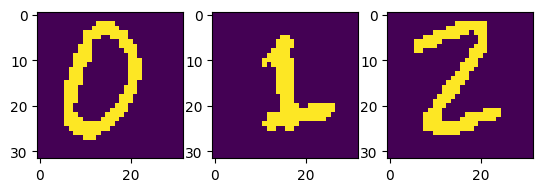

In [3]:
fig, axs = plt.subplots(1,3)

for i, ax in enumerate(axs):
    ax.imshow(im[i])

In [4]:
p1 = np.array([-1, -1, +1, -1, +1, -1, -1, +1]) # --+-+--+
p2 = np.array([-1, -1, -1, -1, -1, +1, -1, -1])
p3 = np.array([-1, +1, +1, -1, -1, +1, -1, +1])
p =[p1,p2,p3]
np.corrcoef(p)

array([[ 1.        , -0.29277002,  0.25819889],
       [-0.29277002,  1.        ,  0.37796447],
       [ 0.25819889,  0.37796447,  1.        ]])

In [5]:
# weigths matrix
W = np.zeros((8,8))
for i in range(3):
    W += np.outer(p[i], p[i])

W = W- 3*np.eye(8)

W/=3
W

array([[ 0.        ,  0.33333333, -0.33333333,  1.        ,  0.33333333,
        -0.33333333,  1.        , -0.33333333],
       [ 0.33333333,  0.        ,  0.33333333,  0.33333333, -0.33333333,
         0.33333333,  0.33333333,  0.33333333],
       [-0.33333333,  0.33333333,  0.        , -0.33333333,  0.33333333,
        -0.33333333, -0.33333333,  1.        ],
       [ 1.        ,  0.33333333, -0.33333333,  0.        ,  0.33333333,
        -0.33333333,  1.        , -0.33333333],
       [ 0.33333333, -0.33333333,  0.33333333,  0.33333333,  0.        ,
        -1.        ,  0.33333333,  0.33333333],
       [-0.33333333,  0.33333333, -0.33333333, -0.33333333, -1.        ,
         0.        , -0.33333333, -0.33333333],
       [ 1.        ,  0.33333333, -0.33333333,  1.        ,  0.33333333,
        -0.33333333,  0.        , -0.33333333],
       [-0.33333333,  0.33333333,  1.        , -0.33333333,  0.33333333,
        -0.33333333, -0.33333333,  0.        ]])

In [6]:
x1 = np.array([+1, -1, +1, -1, +1, -1, -1, +1])
x2 = np.array([+1, +1, -1, -1, -1, +1, -1, -1])
x3 = np.array([+1, +1, +1, -1, +1, +1, -1, +1])
print('p1:', p1, 'x1: ', x1)
print('p2: ', p2, 'x2: ', x2)
print('p3: ', p3, 'x3: ', x3)



p1: [-1 -1  1 -1  1 -1 -1  1] x1:  [ 1 -1  1 -1  1 -1 -1  1]
p2:  [-1 -1 -1 -1 -1  1 -1 -1] x2:  [ 1  1 -1 -1 -1  1 -1 -1]
p3:  [-1  1  1 -1 -1  1 -1  1] x3:  [ 1  1  1 -1  1  1 -1  1]


In [7]:
I =np.random.random((8,1))
def retrieval(x): 
    x_new = x
    for i in range(100):
        x_old = x_new
        x_new = np.sign(W @ x )
        if np.all(x_old == x_new):
            break
    
    if i==99:
        print('not converged')
    else:
        print(f'converged in {i+1} its')
    print(x_new)
    return x_new
    


In [8]:
r1 = retrieval(x1)
print(p1.astype(float))
r2 = retrieval(x2)
print(p2.astype(float))
r3 = retrieval(x3)
print(p3.astype(float))

converged in 2 its
[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1. -1.  1. -1.  1. -1. -1.  1.]
converged in 2 its
[-1. -1. -1.  1. -1.  1.  1. -1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
converged in 2 its
[-1.  1.  1. -1. -1. -1. -1.  1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]


In [9]:
print(np.corrcoef(r1, p1))
print(np.corrcoef(x1, p1))
print(np.corrcoef(r2, p2))
print(np.corrcoef(x2, p2))
print(np.corrcoef(r3, p3))
print(np.corrcoef(x3, p3))


[[1. 1.]
 [1. 1.]]
[[1.         0.77459667]
 [0.77459667 1.        ]]
[[1.         0.48795004]
 [0.48795004 1.        ]]
[[1.         0.48795004]
 [0.48795004 1.        ]]
[[1.         0.77459667]
 [0.77459667 1.        ]]
[[1.         0.57735027]
 [0.57735027 1.        ]]


In [77]:
class HopfieldNetwork():
    def __init__(self) -> None:
        pass

    def _training(self, data: np.array):
        n_examples, dim = data.shape
        self.W = np.zeros((dim,dim ))
        for i in range(n_examples):
            self.W += np.outer(data[i], data[i])

        self.W = self.W- n_examples *np.eye(dim)

        self.W/= dim
        self.n_examples = n_examples
        self.dim = dim

    def _compute_energy(self, x_new, x_old,  neuron):
        # only x[neuron] has changed, so in the outer product only the row and column of the neuron has changed
        old_energy = self.energy[-1]
        new_energy = old_energy - np.dot(self.W[neuron,:], x_new) * x_new[neuron] + np.dot(self.W[neuron,:], x_old) * x_old[neuron] #  add the new energy term and subtract the old energy term multiplied by -1/2 and then by 2 because the matrix is symmetric
        new_energy += self.W[neuron, neuron] * x_new[neuron]**2 
        new_energy -= self.W[neuron, neuron] * x_old[neuron]**2  # adjust because we do not want to count the diagonals

        return new_energy
    
    def retrieval(self, x, data, max_steps, bias =0.6, compute_energy = False):
        self._training(data) # train the network
        if compute_energy:
            outer_xx = np.outer(x, x)
            self.energy = [ -1/2 *(np.sum( self.W * outer_xx) - np.sum(np.diag(self.W) * np.diag(outer_xx))) ] # -1/2 \sum_{i, j, i\neq j} w_{ij} x_i x_j 
        x_new = x.copy()
        for i in range(max_steps):
            neurons = np.random.permutation(self.dim)
            x_old = x_new.copy()
            for neuron in neurons: 
                new_value = np.dot(self.W[neuron, :], x_new)+ bias  
                x_new[neuron] = np.sign(new_value)
                if compute_energy:
                    inefficient_new_energy = (-1/2 *(np.sum( self.W * np.outer(x_new, x_new)) - np.sum(np.diag(self.W) * np.diag(outer_xx))) ) # TODO: inefficient way to compute energy. fix it
                    new_energy = self._compute_energy(x_new, x_old, neuron)
                    print(inefficient_new_energy, new_energy)
                    self.energy.append(new_energy)
            if np.all(x_old == x_new): # check if after a change to every component, the vector is the same. 
                print(f'converged in {i+1} steps')
                break
        return x_new
    
    def plot_energy(self):
        if not hasattr(self, 'energy'):
            print('energy not computed')
            return
        plt.plot(self.energy)
        plt.title('Energy over iterations')
        plt.xlabel('iteration')
        plt.ylabel('energy')
        plt.show()

    

In [78]:
images =np.array(im)
images = images.reshape(3,-1)

-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-865.81640625 [-865.81640625]
-866.166015625 [-866.16601562]
-866.166015625 [-866.16796875]
-866.166015625 [-866.16601562]
-866.166015625 [-866.16796875]
-866.166015625 [-866.16992188]
-866.166015625 [-866.16796875]
-866.166015625 [-866.16601562]
-866.166015625 [-866.16796875]
-866.166015625 [-866.16992188]
-866.166015625 [-866.171875]
-866.166015625 [-866.17382812]
-866.166015625 [-866.17578125]
-866.166015625 [-866.17773438]
-866.166015625 [-866.1796875]
-866.166015625 [-866.17773438

KeyboardInterrupt: 

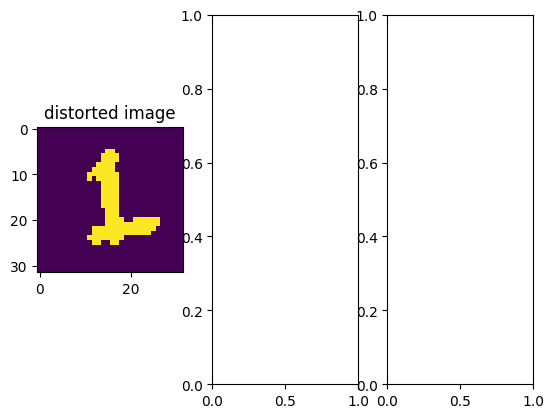

In [79]:
orig = im[1]
dist_img =distort_image(orig, 0.)
fig, axes =plt.subplots(1,3)
axes[0].imshow(dist_img)
axes[0].set_title('distorted image')
dist_img = dist_img.reshape(-1,1)
hopfield_net= HopfieldNetwork()

retrieved = hopfield_net.retrieval(dist_img, images, 100, bias =0.7, compute_energy=True)

axes[1].imshow(retrieved.reshape(32,32))
axes[1].set_title('retrieved image')

axes[2].imshow(orig)
axes[2].set_title('original image')


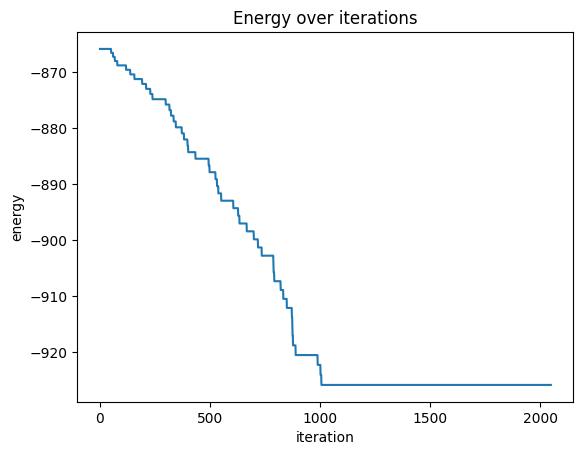

In [66]:
hopfield_net.plot_energy()

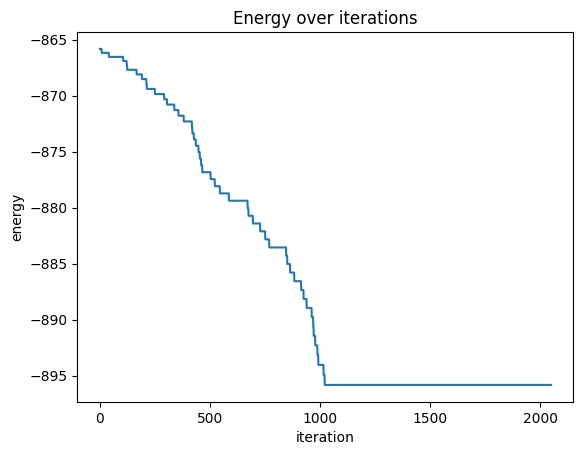

In [60]:
hopfield_net.plot_energy()

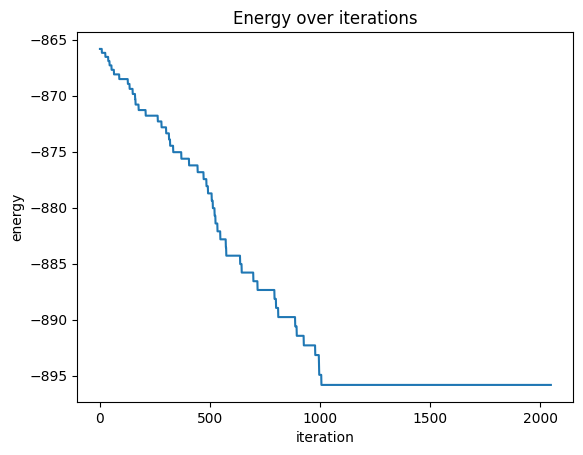

In [62]:
hopfield_net.plot_energy()